# EDA - Alvin Hanafie Sentiment Analysis Dataset
Exploratory Data Analysis for train, validation, and test sentiment datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

## Load Datasets

In [2]:
train_df = pd.read_csv("./train_preprocess_ori.tsv", sep='\t')
valid_df = pd.read_csv("./valid_preprocess.tsv", sep='\t')
test_df = pd.read_csv("./test_preprocess_masked_label.tsv", sep='\t')

print("Train dataset:")
print(f"  Shape: {train_df.shape[0]} rows × {train_df.shape[1]} columns")
print(f"  Columns: {list(train_df.columns)}")

print("\nValidation dataset:")
print(f"  Shape: {valid_df.shape[0]} rows × {valid_df.shape[1]} columns")
print(f"  Columns: {list(valid_df.columns)}")

print("\nTest dataset:")
print(f"  Shape: {test_df.shape[0]} rows × {test_df.shape[1]} columns")
print(f"  Columns: {list(test_df.columns)}")

train_df.head()

Train dataset:
  Shape: 11000 rows × 2 columns
  Columns: ['text', 'sentiment']

Validation dataset:
  Shape: 1260 rows × 2 columns
  Columns: ['text', 'sentiment']

Test dataset:
  Shape: 500 rows × 2 columns
  Columns: ['text', 'sentiment']


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


## Dataset Split Overview

        Split  Count  Percentage
0       Train  11000   86.206897
1  Validation   1260    9.874608
2        Test    500    3.918495


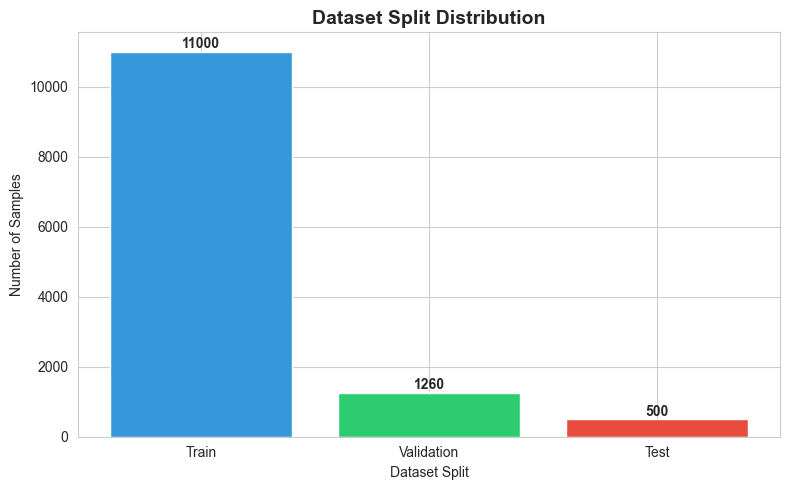

In [3]:
total_samples = len(train_df) + len(valid_df) + len(test_df)

split_data = {
    'Split': ['Train', 'Validation', 'Test'],
    'Count': [len(train_df), len(valid_df), len(test_df)],
    'Percentage': [
        len(train_df)/total_samples*100,
        len(valid_df)/total_samples*100,
        len(test_df)/total_samples*100
    ]
}

split_summary = pd.DataFrame(split_data)
print(split_summary)

plt.figure(figsize=(8, 5))
plt.bar(split_summary['Split'], split_summary['Count'], color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Dataset Split Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset Split')
for i, v in enumerate(split_summary['Count']):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## Sentiment Distribution - Training Set

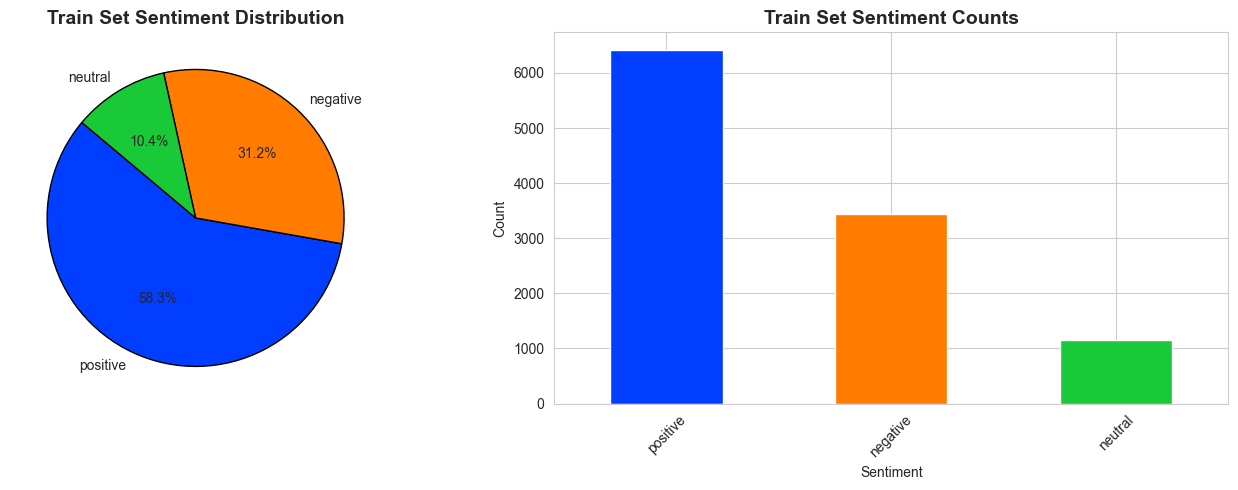

In [5]:
colors = sns.color_palette("bright", n_colors=len(train_df['sentiment'].unique()))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].pie(train_df['sentiment'].value_counts(), 
            labels=train_df['sentiment'].value_counts().index, 
            autopct='%1.1f%%', 
            colors=colors, 
            startangle=140, 
            wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Train Set Sentiment Distribution", fontsize=14, fontweight='bold')

train_df['sentiment'].value_counts().plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title("Train Set Sentiment Counts", fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Sentiment Distribution - Validation Set

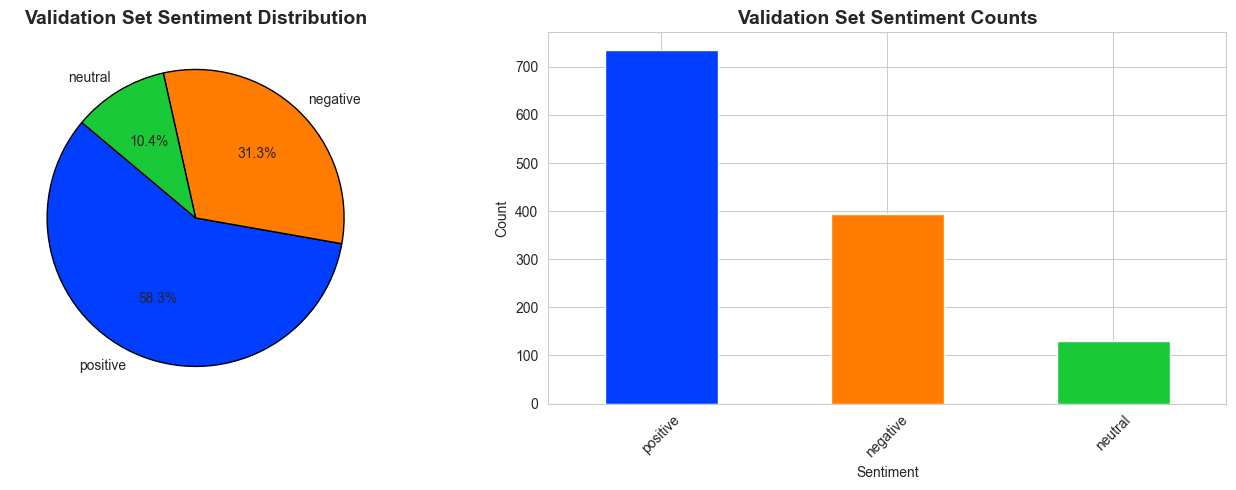

In [18]:
colors = sns.color_palette("bright", n_colors=len(valid_df['sentiment'].unique()))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(valid_df['sentiment'].value_counts(), 
            labels=valid_df['sentiment'].value_counts().index, 
            autopct='%1.1f%%', 
            colors=colors, 
            startangle=140, 
            wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Validation Set Sentiment Distribution", fontsize=14, fontweight='bold')

# Bar chart
valid_df['sentiment'].value_counts().plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title("Validation Set Sentiment Counts", fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Sentiment Distribution Comparison

Sentiment distribution comparison (%):

               Train  Validation
sentiment                       
positive   58.327273   58.333333
negative   31.236364   31.269841
neutral    10.436364   10.396825


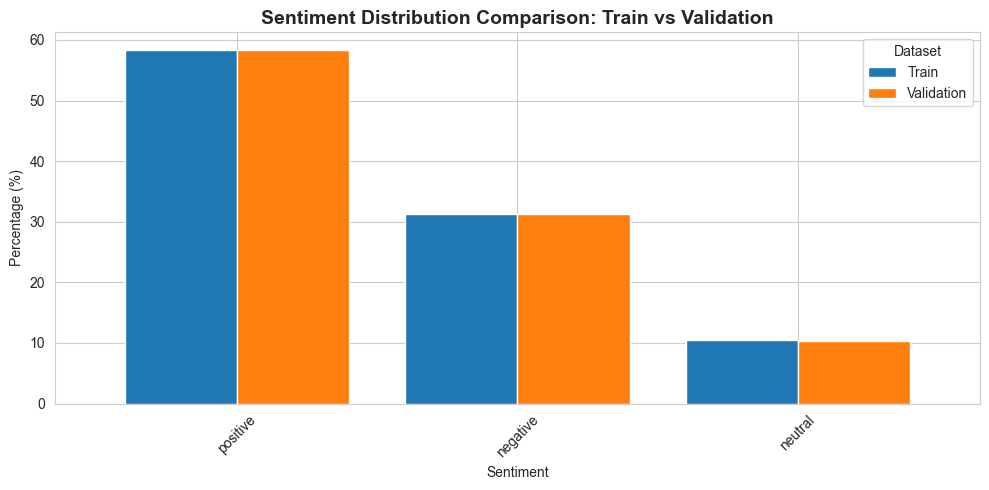

In [7]:
train_sentiment_pct = train_df['sentiment'].value_counts(normalize=True) * 100
valid_sentiment_pct = valid_df['sentiment'].value_counts(normalize=True) * 100

comparison_df = pd.DataFrame({
    'Train': train_sentiment_pct,
    'Validation': valid_sentiment_pct
}).fillna(0)

print("Sentiment distribution comparison (%):\n")
print(comparison_df)

comparison_df.plot(kind='bar', figsize=(10, 5), width=0.8)
plt.title('Sentiment Distribution Comparison: Train vs Validation', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

## Text Analysis - Training Set

In [8]:
print("Train set missing values:")
print(train_df.isnull().sum())

train_df['text'] = train_df['text'].fillna('')
train_df = train_df[train_df['text'] != ''].copy()

print(f"\nTrain dataset shape after cleaning: {train_df.shape}")

Train set missing values:
text         0
sentiment    0
dtype: int64

Train dataset shape after cleaning: (11000, 2)


## Text Length Analysis

In [9]:
train_df['length'] = train_df['text'].str.len()
valid_df['length'] = valid_df['text'].str.len()
test_df['length'] = test_df['text'].str.len()

print("Train set text length statistics:")
print(f"  Mean: {train_df['length'].mean():.2f}")
print(f"  Median: {train_df['length'].median():.2f}")
print(f"  Std Dev: {train_df['length'].std():.2f}")
print(f"  Min: {train_df['length'].min()}")
print(f"  Max: {train_df['length'].max()}")

train_df.head(5)

Train set text length statistics:
  Mean: 188.90
  Median: 160.00
  Std Dev: 121.08
  Min: 3
  Max: 567


,text,sentiment,length
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,404
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,102
2,lokasi strategis di jalan sumatera bandung . t...,positive,184
3,betapa bahagia nya diri ini saat unboxing pake...,positive,93
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,214


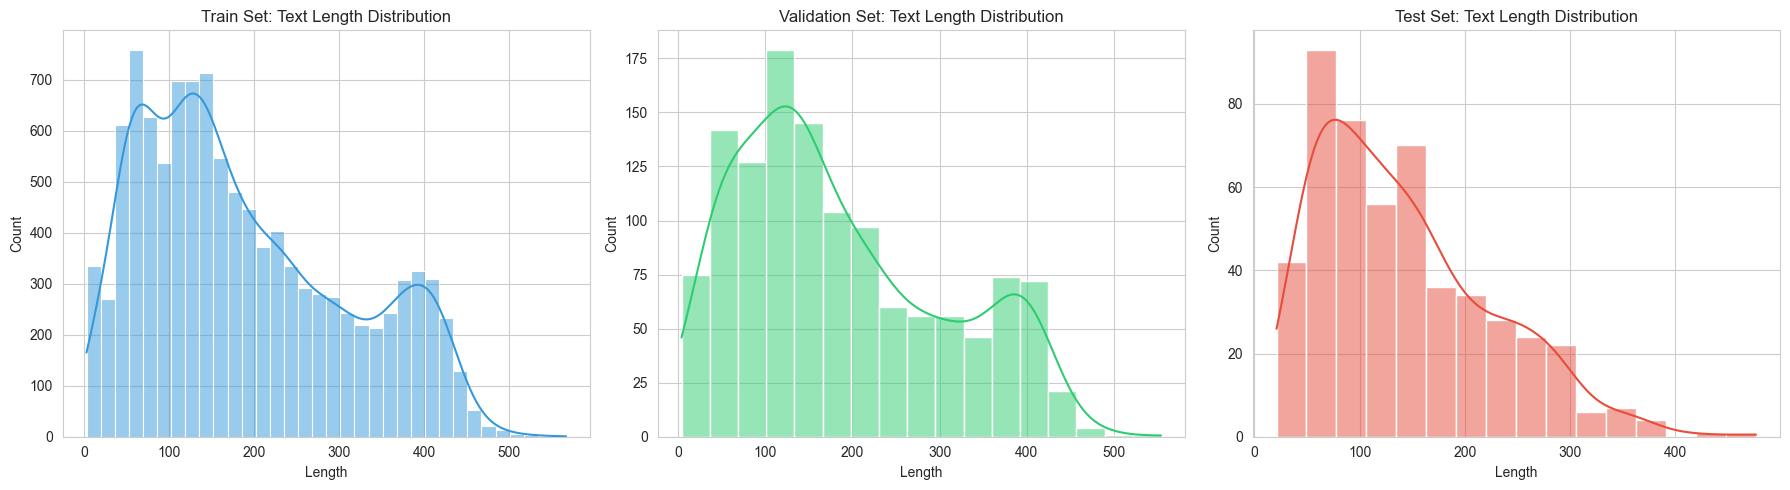

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(train_df['length'], kde=True, ax=axes[0], color='#3498db')
axes[0].set_xlabel('Length')
axes[0].set_title('Train Set: Text Length Distribution')

sns.histplot(valid_df['length'], kde=True, ax=axes[1], color='#2ecc71')
axes[1].set_xlabel('Length')
axes[1].set_title('Validation Set: Text Length Distribution')

sns.histplot(test_df['length'], kde=True, ax=axes[2], color='#e74c3c')
axes[2].set_xlabel('Length')
axes[2].set_title('Test Set: Text Length Distribution')

plt.tight_layout()
plt.show()

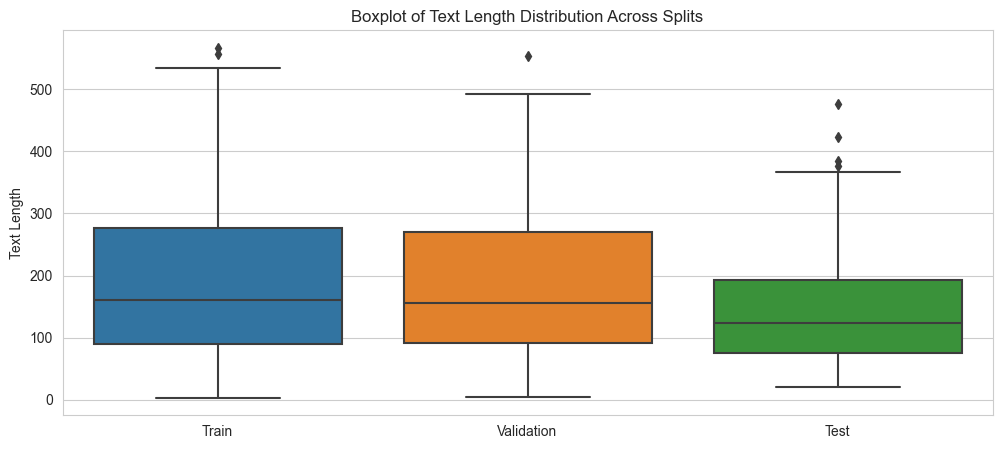

In [11]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=[train_df['length'], valid_df['length'], test_df['length']])
plt.xticks([0, 1, 2], ['Train', 'Validation', 'Test'])
plt.ylabel('Text Length')
plt.title('Boxplot of Text Length Distribution Across Splits')
plt.show()

## Text Length by Sentiment - Training Set

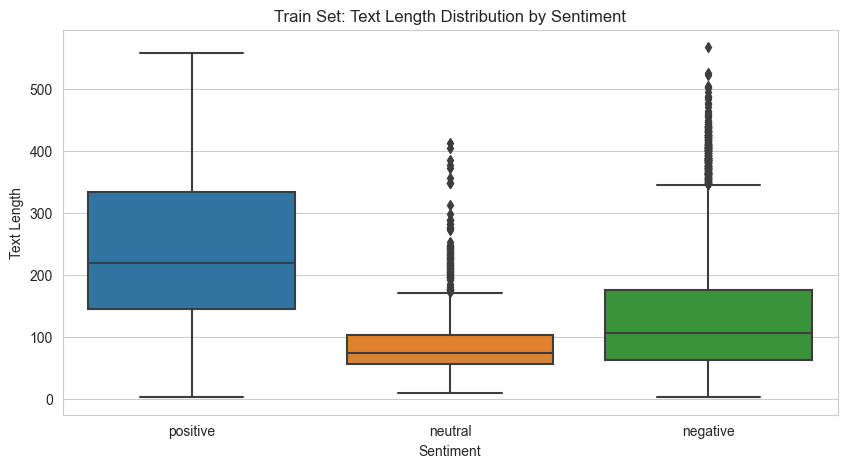

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='length', data=train_df)
plt.title('Train Set: Text Length Distribution by Sentiment')
plt.ylabel('Text Length')
plt.xlabel('Sentiment')
plt.show()

## N-gram Analysis - Training Set

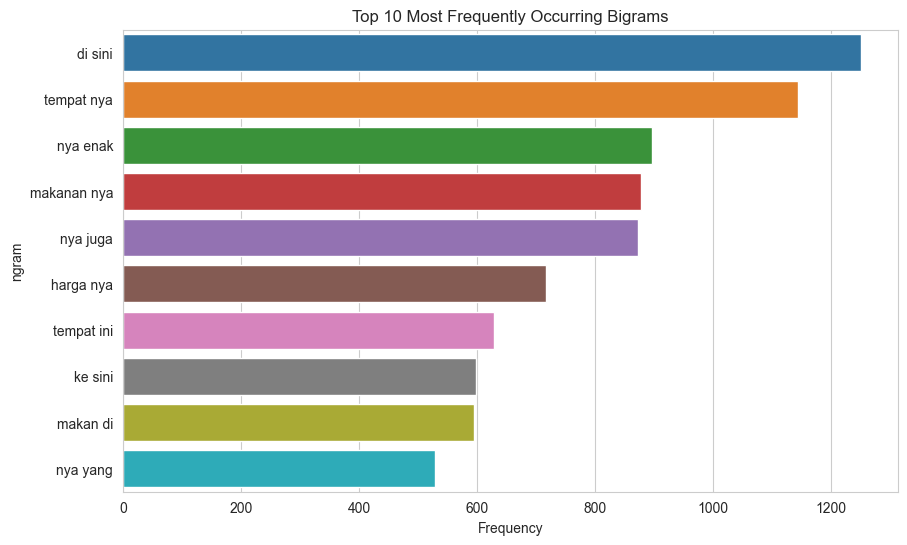

In [13]:
# bigram
cv = CountVectorizer(ngram_range=(2,2), max_features=100)
bigrams = cv.fit_transform(train_df['text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
ngram_freq.columns = ["frequency", "ngram"]

plt.figure(figsize=(10, 6))
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.xlabel('Frequency')
plt.show()

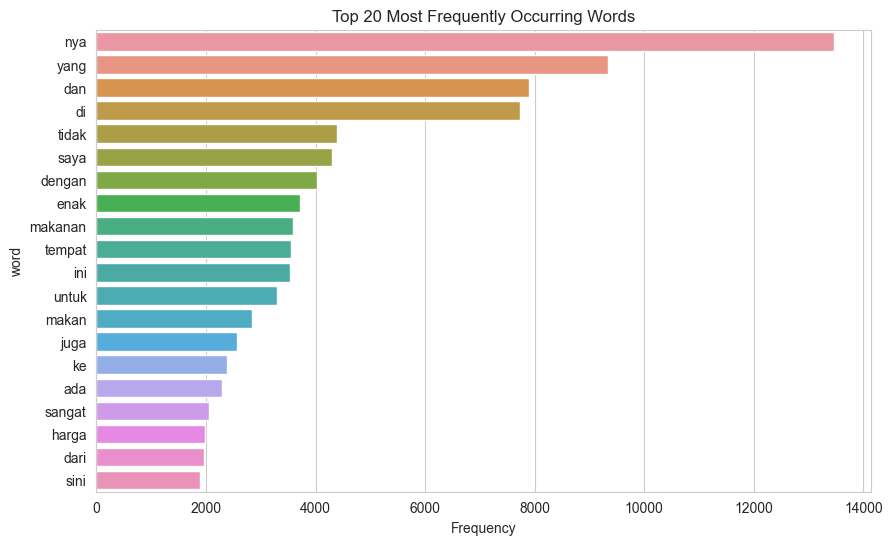

In [14]:
# unigram
cv_unigram = CountVectorizer(ngram_range=(1,1), max_features=100)
unigrams = cv_unigram.fit_transform(train_df['text'])

count_values_uni = unigrams.toarray().sum(axis=0)
unigram_freq = pd.DataFrame(sorted([(count_values_uni[i], k) for k, i in cv_unigram.vocabulary_.items()], reverse=True))
unigram_freq.columns = ["frequency", "word"]

plt.figure(figsize=(10, 6))
sns.barplot(x=unigram_freq['frequency'][:20], y=unigram_freq['word'][:20])
plt.title('Top 20 Most Frequently Occurring Words')
plt.xlabel('Frequency')
plt.show()

## N-gram Analysis by Sentiment

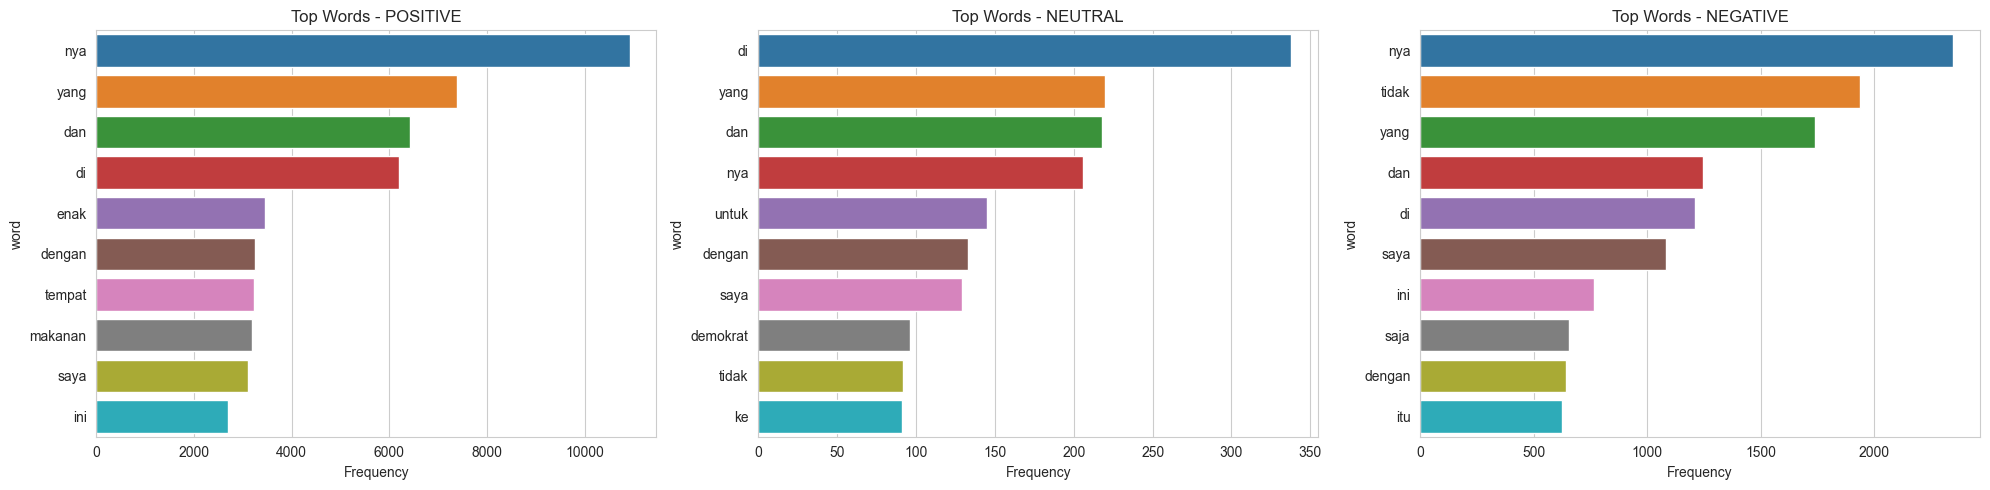

In [15]:
# top words per sentiment
sentiments = train_df['sentiment'].unique()

fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 5))
if len(sentiments) == 1:
    axes = [axes]

for idx, sentiment in enumerate(sentiments):
    sentiment_texts = train_df[train_df['sentiment'] == sentiment]['text']
    
    cv_sent = CountVectorizer(ngram_range=(1,1), max_features=50)
    words_sent = cv_sent.fit_transform(sentiment_texts)
    
    count_vals = words_sent.toarray().sum(axis=0)
    word_freq = pd.DataFrame(sorted([(count_vals[i], k) for k, i in cv_sent.vocabulary_.items()], reverse=True))
    word_freq.columns = ["frequency", "word"]
    
    sns.barplot(x=word_freq['frequency'][:10], y=word_freq['word'][:10], ax=axes[idx])
    axes[idx].set_title(f'Top Words - {sentiment.upper()}')
    axes[idx].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

## Summary Statistics

In [19]:
print("=" * 60)
print("COMPLETE DATASET SUMMARY")
print("=" * 60)

print("\nDATASET SPLITS:")
print(f"  Total samples: {total_samples}")
print(f"  Train: {len(train_df)} ({len(train_df)/total_samples*100:.2f}%)")
print(f"  Validation: {len(valid_df)} ({len(valid_df)/total_samples*100:.2f}%)")
print(f"  Test: {len(test_df)} ({len(test_df)/total_samples*100:.2f}%)")

print("\nTRAIN SET SENTIMENT DISTRIBUTION:")
for sentiment, count in train_df['sentiment'].value_counts().items():
    percentage = (count / len(train_df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")

print("\nTEXT LENGTH STATISTICS:")
print(f"  Train - Avg: {train_df['length'].mean():.2f}, Median: {train_df['length'].median():.2f}")
print(f"  Valid - Avg: {valid_df['length'].mean():.2f}, Median: {valid_df['length'].median():.2f}")
print(f"  Test  - Avg: {test_df['length'].mean():.2f}, Median: {test_df['length'].median():.2f}")

print("\n" + "=" * 60)

COMPLETE DATASET SUMMARY

DATASET SPLITS:
  Total samples: 12760
  Train: 11000 (86.21%)
  Validation: 1260 (9.87%)
  Test: 500 (3.92%)

TRAIN SET SENTIMENT DISTRIBUTION:
  positive: 6416 (58.33%)
  negative: 3436 (31.24%)
  neutral: 1148 (10.44%)

TEXT LENGTH STATISTICS:
  Train - Avg: 188.90, Median: 160.00
  Valid - Avg: 186.12, Median: 156.00
  Test  - Avg: 142.07, Median: 123.00

